In [1]:
# Step 1: Import required libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#  Step 1: Generate the dataset
X, y = make_blobs(n_samples=500,
                 n_features=2,
                 centers=2,  # Using 2 centers for binary classification
                 cluster_std=1.0,
                 random_state=42)

In [3]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=9)


In [4]:
# Step 4: Scale the features
# SVM is sensitive to feature scaling, so we standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Step 4: Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42,C=0.5)
svm_classifier.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

In [6]:
# Step 6: Get support vectors and weights
support_vectors = svm_classifier.support_vectors_
support_vector_indices = svm_classifier.support_
n_support_vectors = svm_classifier.n_support_

# Calculate weight vector and bias
weights = svm_classifier.coef_[0]
bias = svm_classifier.intercept_[0]

# Calculate weight vector norm
weight_norm = np.linalg.norm(weights)



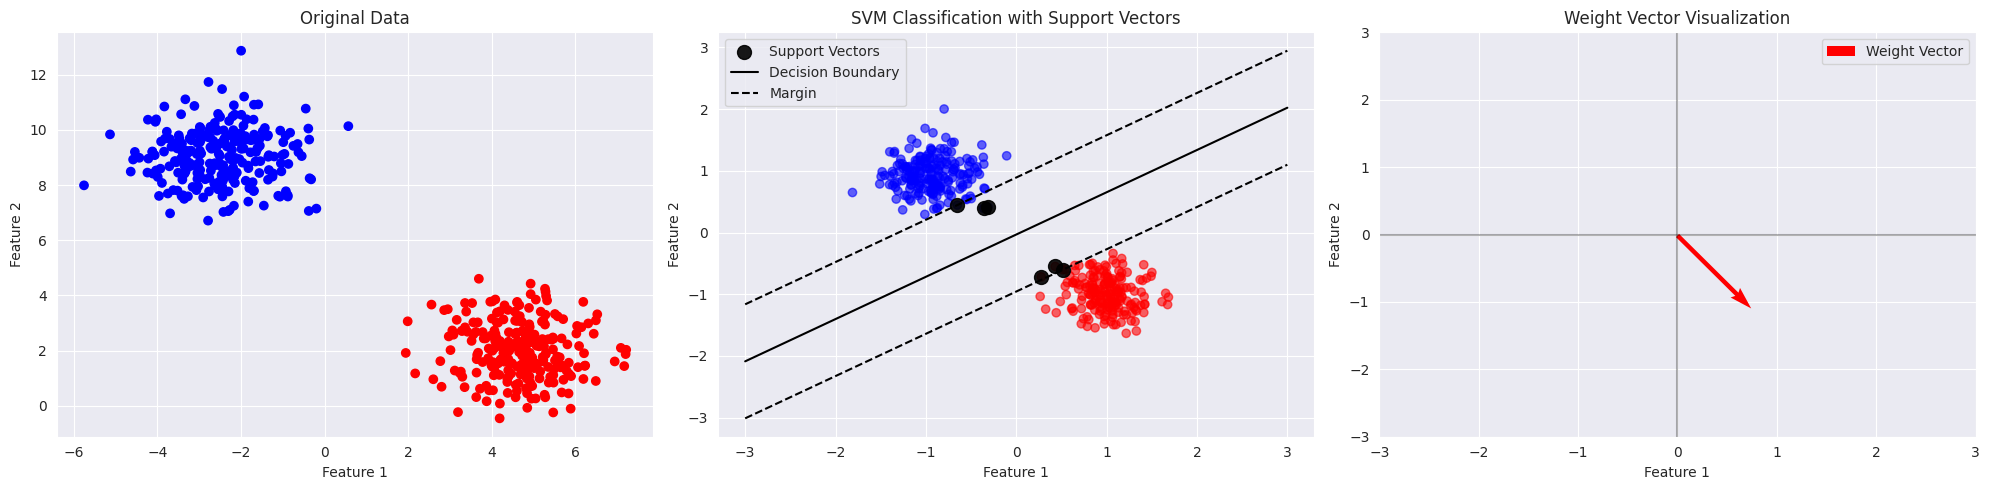

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[44  0]
 [ 0 56]]

SVM Analysis Results:
Number of support vectors: 6
Weight vector: [ 0.7413972  -1.08235096]
Bias (intercept): -0.03537291222211697
Weight vector norm: 1.3119273698909177
Margin width: 0.7622373181246661

Support vector indices: [ 43 303 384 298 332 351]


In [7]:
# Step 7: Visualization
plt.figure(figsize=(20, 5))

# Plot 1: Original Data
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 2: Data with Support Vectors
plt.subplot(132)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
           c=y_train, cmap='bwr', alpha=0.6)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
           c='black', marker='o', s=100, label='Support Vectors',
           linewidth=1, alpha=0.9)

# Plot decision boundary
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

# Plot margins
margin = 1 / np.sqrt(np.sum(svm_classifier.coef_[0] ** 2))
yy_neg = yy - np.sqrt(1 + a ** 2) * margin
yy_pos = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_neg, 'k--', label='Margin')
plt.plot(xx, yy_pos, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Support Vectors')
plt.legend()

# Plot 3: Weight Vector Visualization
plt.subplot(133)
plt.quiver(0, 0, weights[0], weights[1],
          angles='xy', scale_units='xy', scale=1,
          color='r', label='Weight Vector')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Weight Vector Visualization')
plt.legend()

plt.tight_layout()
plt.show()

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print SVM Analysis Results
print("\nSVM Analysis Results:")
print(f"Number of support vectors: {len(support_vectors)}")
print(f"Weight vector: {weights}")
print(f"Bias (intercept): {bias}")
print(f"Weight vector norm: {weight_norm}")
print(f"Margin width: {1/weight_norm}")
print(f"\nSupport vector indices: {support_vector_indices}")

# Part B


===== SVM with rbf kernel =====


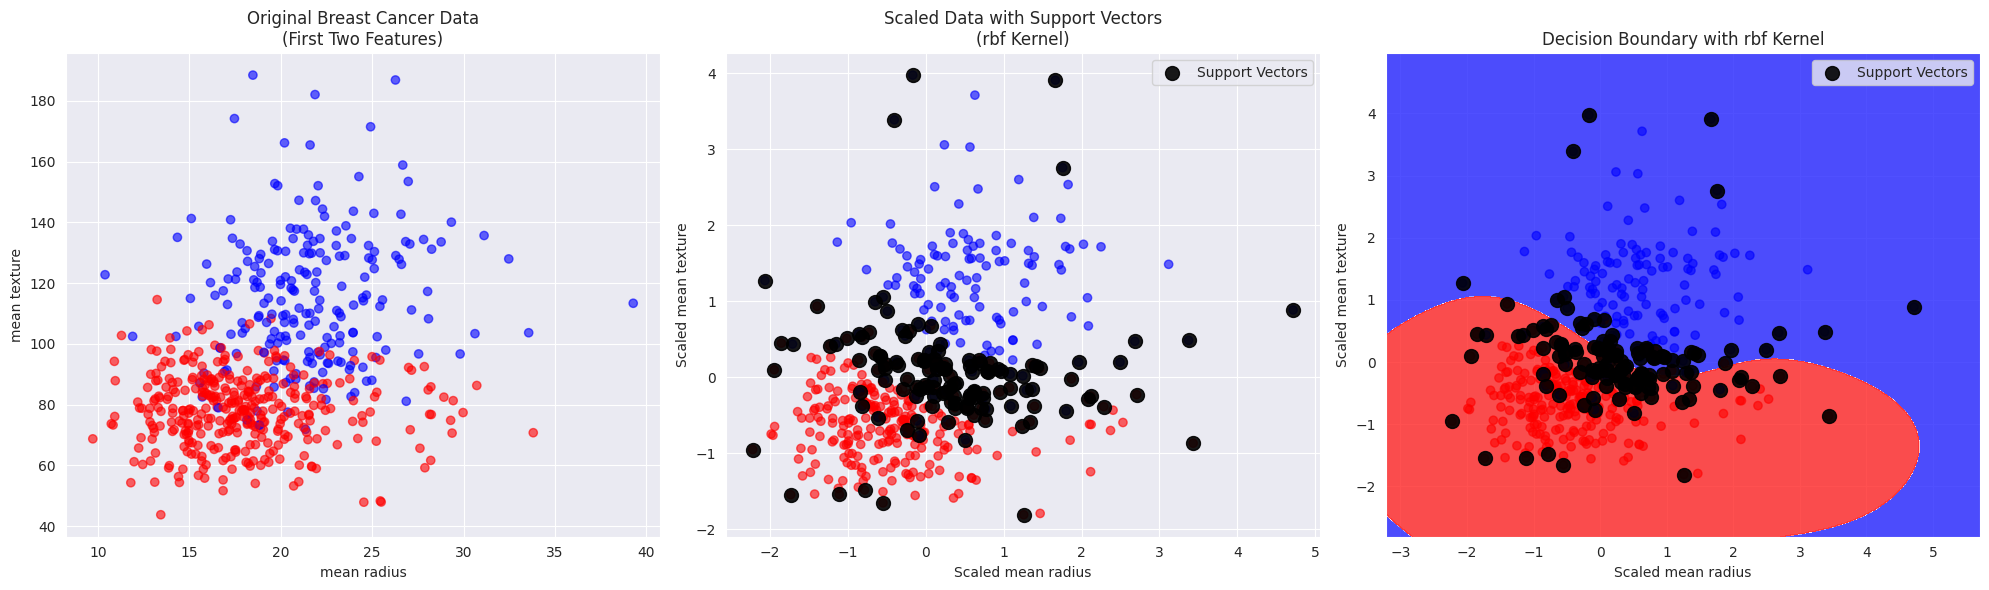

Classification Metrics for Complete Dataset:

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.79      0.88        43
      benign       0.89      1.00      0.94        71

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114


SVM Analysis Results:
Number of support vectors: 129
Number of features used: 30


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Step 2: Select two features for visualization (mean radius and mean texture)
X_visualization = X[:, [1, 2]]  # Using first two features for visualization

# Step 3: Split the dataset
# Split for complete dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split for visualization dataset
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_visualization, y,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale visualization features
scaler_vis = StandardScaler()
X_vis_train_scaled = scaler_vis.fit_transform(X_vis_train)
X_vis_test_scaled = scaler_vis.transform(X_vis_test)

# Step 5: Train and visualize SVM with RBF kernel
kernel = 'rbf'
print(f"\n===== SVM with {kernel} kernel =====")

# Train on complete dataset
svm_classifier = SVC(kernel=kernel, random_state=42,C=0.02)
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)

# Train on visualization dataset
svm_vis = SVC(kernel=kernel, random_state=42)
svm_vis.fit(X_vis_train_scaled, y_vis_train)
y_vis_pred = svm_vis.predict(X_vis_test_scaled)

# Get support vectors for visualization
support_vectors = svm_vis.support_vectors_
support_vector_indices = svm_vis.support_

# Plot graphs
plt.figure(figsize=(20, 6))

# Plot 1: Original Data (2D)
plt.subplot(131)
plt.scatter(X_visualization[:, 0], X_visualization[:, 1],
            c=y, cmap='bwr', alpha=0.6)
plt.title('Original Breast Cancer Data\n(First Two Features)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Plot 2: Scaled Data with Support Vectors
plt.subplot(132)
plt.scatter(X_vis_train_scaled[:, 0], X_vis_train_scaled[:, 1],
            c=y_vis_train, cmap='bwr', alpha=0.6)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            c='black', marker='o', s=100, label='Support Vectors',
            linewidth=1, alpha=0.9)
plt.xlabel('Scaled ' + feature_names[0])
plt.ylabel('Scaled ' + feature_names[1])
plt.title(f'Scaled Data with Support Vectors\n({kernel} Kernel)')
plt.legend()

# Plot 3: Scaled Data with Decision Boundary
plt.subplot(133)
x_min, x_max = X_vis_train_scaled[:, 0].min() - 1, X_vis_train_scaled[:, 0].max() + 1
y_min, y_max = X_vis_train_scaled[:, 1].min() - 1, X_vis_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X_vis_train_scaled[:, 0], X_vis_train_scaled[:, 1], c=y_vis_train, cmap='bwr', alpha=0.6)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='black', marker='o', s=100, label='Support Vectors', linewidth=1, alpha=0.9)
plt.xlabel('Scaled ' + feature_names[0])
plt.ylabel('Scaled ' + feature_names[1])
plt.title(f'Decision Boundary with {kernel} Kernel')
plt.legend()

plt.tight_layout()
plt.show()

# Print Results
print("Classification Metrics for Complete Dataset:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nSVM Analysis Results:")
print(f"Number of support vectors: {len(support_vectors)}")
print(f"Number of features used: {X.shape[1]}")


# XOR Problem

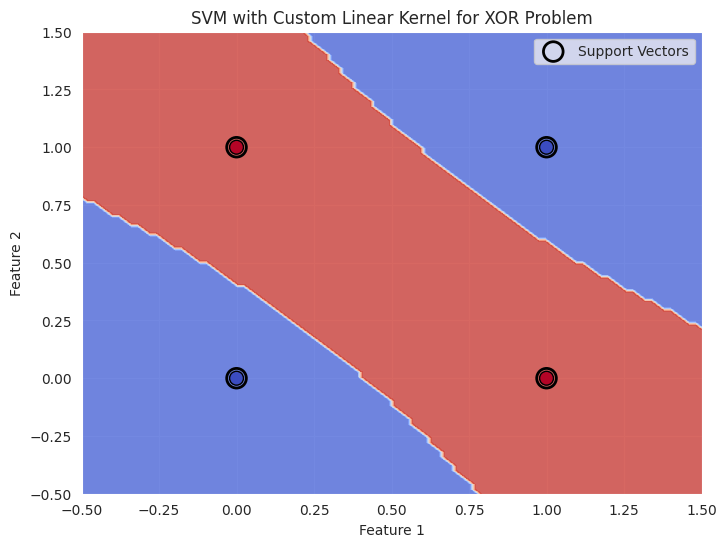

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Create XOR data points
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])  # XOR labels

# Step 2: Define the custom linear kernel function
def custom_linear_kernel(X1, X2):
    return linear_kernel(X1, X2)  # Standard linear kernel (dot product)

# Step 3: Compute the kernel matrix
kernel_matrix = custom_linear_kernel(X, X)

# Step 4: Train the SVM with the precomputed kernel
svm = SVC(kernel='rbf', C=0.1)
svm.fit(kernel_matrix, y)

# Step 5: Visualize the decision boundary
# Generate a grid of points for plotting
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute the kernel matrix for the grid
grid_kernel_matrix = custom_linear_kernel(grid, X)
predictions = svm.predict(grid_kernel_matrix).reshape(xx.shape)

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.scatter(X[svm.support_][:, 0], X[svm.support_][:, 1],
            facecolors='none', edgecolors='k', s=200, linewidth=2, label='Support Vectors')
plt.title('SVM with Custom Linear Kernel for XOR Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Kernel Matrix (RBF):
[[1.00000000e+00 3.72665317e-06 3.67879441e-01 1.50343919e-03]
 [3.72665317e-06 1.00000000e+00 3.72665317e-06 3.67879441e-01]
 [3.67879441e-01 3.72665317e-06 1.00000000e+00 1.50343919e-03]
 [1.50343919e-03 3.67879441e-01 1.50343919e-03 1.00000000e+00]]


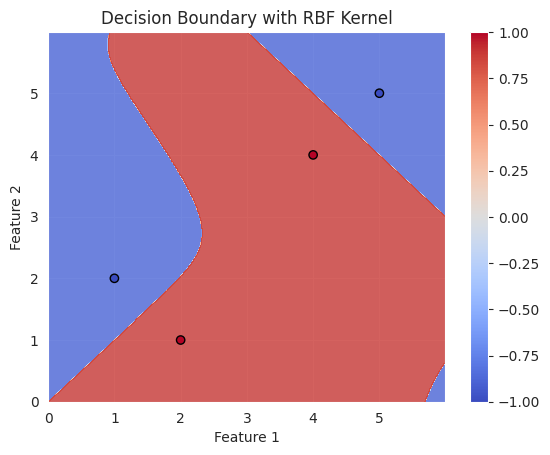

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Create the dataset
X = np.array([
    [1, 2],
    [5, 5],
    [2, 1],
    [4, 4]
])
y = np.array([-1, -1, 1, 1])  # Labels

# Step 2: Compute the kernel matrix (RBF kernel)
gamma = 0.5  # RBF kernel parameter
kernel_matrix = rbf_kernel(X, X, gamma=gamma)
print("Kernel Matrix (RBF):")
print(kernel_matrix)

# Step 3: Train the SVM classifier
svm_classifier = SVC(kernel='rbf', gamma=gamma, C=0.5)
svm_classifier.fit(X, y)

# Step 4: Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    # Create a mesh to plot the boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('Decision Boundary with RBF Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

plot_decision_boundary(svm_classifier, X, y)


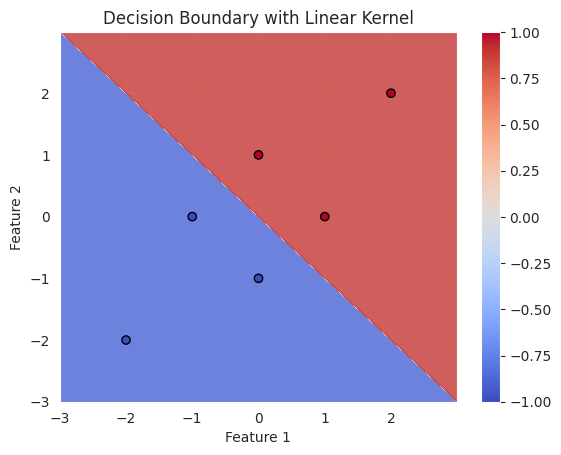

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Create the dataset
X = np.array([
    [1, 0],
    [0, 1],
    [0, -1],
    [-1, 0],
    [2,2],
    [-2,-2]
])
y = np.array([1, 1, -1, -1,1,-1])  # Labels


# Step 3: Train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X, y)

# Step 4: Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    # Create a mesh to plot the boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('Decision Boundary with Linear Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

plot_decision_boundary(svm_classifier, X, y)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Combine train and test datasets for simplicity
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Flatten the 28x28 images into vectors of length 784
X = X.reshape(X.shape[0], -1)

# Normalize the data (scale pixel values to [0, 1])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X = X_train[:56000:20]
y = y_train[:56000:20]
X_test = X_test[:14000:20]
y_test = y_test[:14000:20]

Training SVM with linear kernel...
linear kernel accuracy: 0.9000

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.88      0.97      0.92        73
           2       0.93      0.94      0.94        72
           3       0.83      0.81      0.82        80
           4       0.90      0.89      0.89        61
           5       0.84      0.83      0.83        69
           6       0.99      0.96      0.97        70
           7       0.88      0.95      0.91        73
           8       0.91      0.75      0.82        65
           9       0.90      0.92      0.91        65

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Training SVM with poly kernel...
poly kernel accuracy: 0.7171

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        72
  

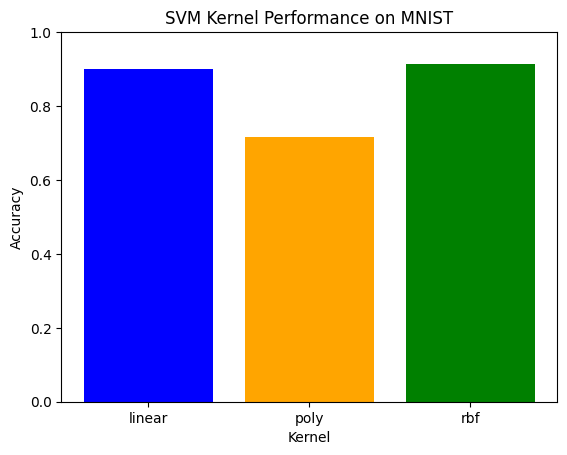

In [ ]:
# Define kernels to evaluate
kernels = ['linear', 'poly', 'rbf']
results = {}

# Train and evaluate the SVM with each kernel
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    model = SVC(kernel=kernel, degree=3 if kernel == 'poly' else 0, gamma='scale', random_state=42)
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel} kernel accuracy: {accuracy:.4f}\n")
    results[kernel] = accuracy

    # Classification report
    print(classification_report(y_test, y_pred))

# Compare performance
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.title("SVM Kernel Performance on MNIST")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
